In [1]:
import nltk

In [2]:
import pandas as pd
data=pd.read_csv('Sentiment.csv')

In [3]:
data=data[['text','sentiment']]

In [4]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data,test_size=0.1)
train=train[train.sentiment!='Neutral']

In [5]:
train_pos=train[train.sentiment=='Positive']
train_pos=train_pos['text']
train_neg=train[train.sentiment=='Negative']
train_neg=train_neg['text']
#print(' '.join(train_pos))

In [6]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def wordCloudDraw(data,color='black'):
    words=' '.join(data)
    cleared_words=" ".join([word for word in words.split() if 'http' not in word and not word.startswith('@') and not word.startswith('#') and word!='RT'])
    wordcloud=WordCloud(width=3000,height=2500,stopwords=STOPWORDS,background_color=color).generate(cleared_words)
    plt.figure(1,figsize=(15,15))
    plt.imshow(wordcloud)
    #plt.axes('off')
    plt.show()

positive


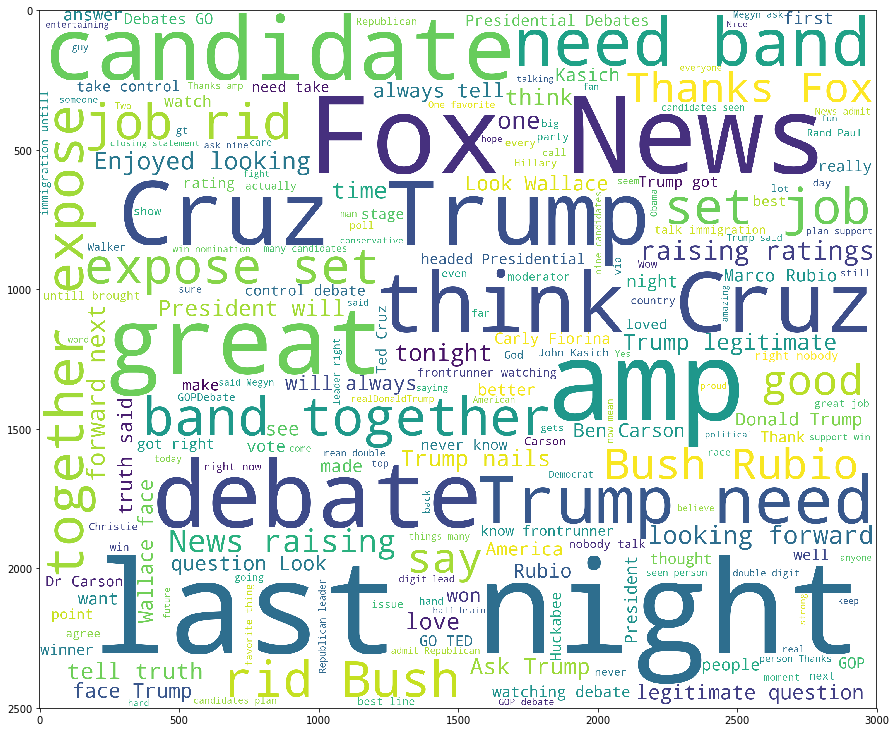

In [8]:
print('positive')
wordCloudDraw(train_pos,'white')

negative


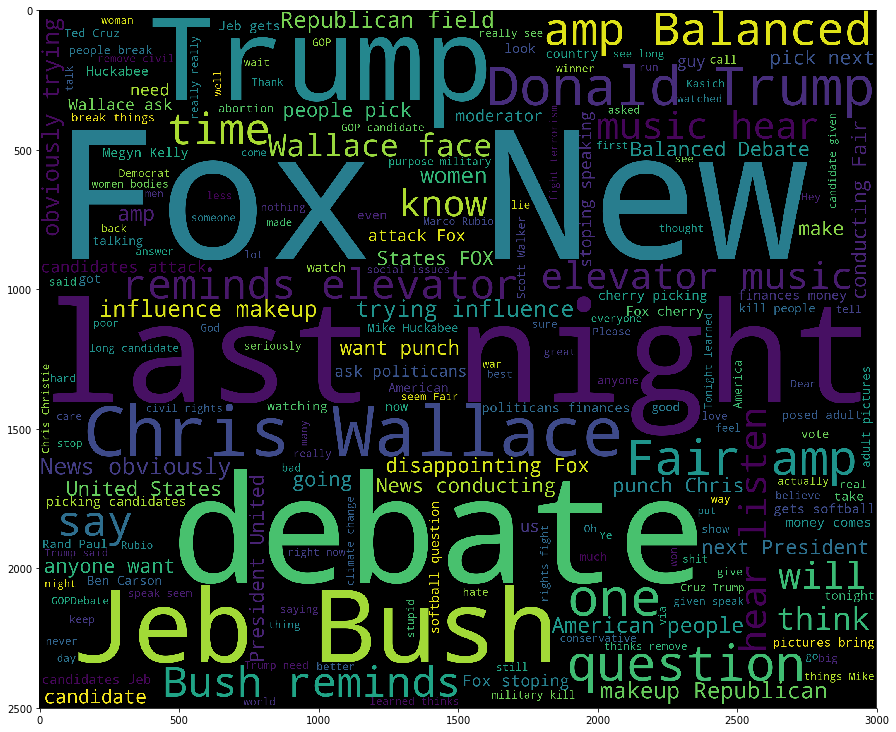

In [9]:
print('negative')
wordCloudDraw(train_neg)

In [10]:
from nltk.corpus import stopwords
tweets=[]
stopwordset=set(stopwords.words('english'))

for index,row in train.iterrows():
    #print(row)
    words_filtered=[a.lower() for a in row.text.split() if len(a)>2]
    #print(words_filtered)
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stoppers=[word for word in words_cleaned if not word in stopwordset]
    tweets.append((words_without_stoppers,row.sentiment))


In [11]:
test_pos=test[test['sentiment']=='Positive']
test_pos=test_pos['text']
test_neg=test[test['sentiment']=='Negative']
test_neg=test_neg['text']

In [12]:
#print(tweets)
def get_words_in_tweets(tweets):
    all=[]
    for (word,sentiment) in tweets:
        all.extend(word)
    #print(all)
    return all

def get_words_features(wordlist):
    wordlist=nltk.FreqDist(wordlist)
    features=wordlist.keys()
    return features

w_features=get_words_features(get_words_in_tweets(tweets))

#wordCloudDraw(w_features)

In [13]:
print(len(w_features))

14631


In [14]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [15]:
training_set = nltk.classify.apply_features(extract_features,tweets)
classifier=nltk.NaiveBayesClassifier.train(training_set)

In [16]:
neg_count=0
pos_count=0
for obj in test_neg:
    res=classifier.classify(extract_features(obj.split()))
    if(res=='Negative'):
        neg_count+=1
for obj in test_pos:
    res=classifier.classify(extract_features(obj.split()))
    if(res=='Positive'):
        pos_count+=1

In [18]:
print('[Negative]: %s/%s '  % (len(test_neg),neg_count))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_count)) 

[Negative]: 856/817 
[Positive]: 234/85 
